In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 25 20:04:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## INSTALL LIBRARIES

In [3]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers
!pip install stop-words
!pip install umap-learn
!pip install gensim=="4.1.2"
!pip install scikit-learn-extra
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install keras
!pip install tensorflow
!pip install jupyterlab_widgets
!pip install ipywidgets
!pip install tqdm
!pip install plotly
!pip install spherecluster

     |████████████████████████████████| 998 kB 13.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=e06e57a31d2d46c226e14424c0d92c596c9e870084f65c2ba520618680d48625
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect
  Created wheel for language-detector: filename=language_detector-5.0.2-py3-none-any.whl size=7054 sha256=4dd738d743931c1b2daa1634ca5bcc5f5f5573e403014dc097babb1fd4a94eba
  Stored in directory: /root/.cache/pip/wheels/12/40/73/a0765d65e793332b79dfe6c34c713e7c0066ea785191b3f50a
Successfully built language-detector
     |████████████████████████████████| 2.6 MB 8.9 MB/s 
     |████████████████████████████████| 125 kB 49.1 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 3.8 MB 29.8 MB/s 
     |████████████████████████████████| 1.2 MB 9.3 MB/s 
     |████████████████████████████████| 67 kB

## Libraries

In [4]:
# Import libraries
import os
import json
import pandas as pd
from tqdm import tqdm
import numpy as np
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tqdm import trange
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.coherencemodel import CoherenceModel
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import datetime
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import logging

#from model import *
#from utils import *
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=Warning)

import argparse

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.models.nmf import Nmf

import random as rn

from scipy import spatial

from sentence_transformers import SentenceTransformer

from sklearn_extra.cluster import KMedoids
import joblib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/GEAC/

'Copia di GEAC.ipynb'   MODELS	      Spark_MESSAGE.model
 GEAC.ipynb	        PREDICTIONS   Spark_ORIGIN+MESSAGE.model
 Input		        RUN	      Spark_SPLIT.model


In [ ]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/GEAC/

/content/gdrive/My Drive/Colab Notebooks/GEAC


In [ ]:
pathname="/content/gdrive/MyDrive/Colab Notebooks/GEAC"

## Autoencoders

In [5]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PYTHONHASHSEED']='0'
os.environ['CUDA_VISIBLE_DEVICES']=''

In [6]:
class Autoencoder:
    def __init__(self, latent_dim = 32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None
        self.Xtrain=None
        self.Xtest=None

    def _compile(self, input_dim):
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoded_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.binary_crossentropy) #ADAM + MEAN ABS ERROR

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X, random_state=42)
        self.Xtrain=X_train
        self.Xtest=X_test
        self.his = self.autoencoder.fit(X_train, X_train, epochs=self.epochs, batch_size=self.batch_size, shuffle=False, validation_data=(X_test, X_test), verbose=0, workers=1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1101)]            0         
                                                                 
 dense_2 (Dense)             (None, 32)                35264     
                                                                 
Total params: 35,264
Trainable params: 35,264
Non-trainable params: 0
_________________________________________________________________
None


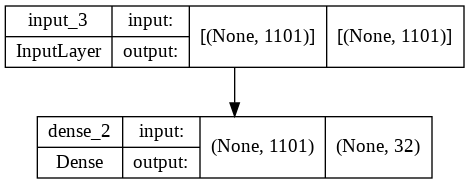

In [12]:
from keras.utils.vis_utils import plot_model
model=Autoencoder()
model._compile(1101)
print(model.encoder.summary())
plot_model(model.encoder, show_shapes=True, show_layer_names=True)


## MODEL

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
#import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import numpy as np
#from Autoencoder import *
#from preprocess import *
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('expand_frame_repr', False)
from datetime import datetime

# define model object
class Topic_Model:
    def __init__(self, k=10, method='BERT', gamma=15, delta=15, epsilon=15, AE_latent_dim=32, AE_epochs=100, modelw2v=None, cluster_model=None, cluster_metric=None, scale=None, reduce=None, DEBUG=False):

        if method not in {'BERT', 'BERT_LDA', "BERT_LDA_W2V", "W2V", "W2V_LDA", "BERT_W2V", "BERT_NMF", "BERT_NMF_W2V", "W2V_NMF"}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        self.ldamodel = None
        self.nmfmodel = None
        self.modelw2v = modelw2v
        self.vec = {}
        self.gamma = gamma #15  # parameter for reletive importance of lda
        self.delta = delta
        self.epsilon = epsilon
        self.method = method
        self.AE = None
        self.AE_latent_dim=AE_latent_dim
        self.AE_epochs=AE_epochs
        self.ldavec=None
        self.nmfvec=None
        self.bertvec=None
        self.w2vvec=None
        self.cm=cluster_model
        self.scale=scale
        self.cluster_metric=cluster_metric
        self.cluster_model=None
        self.reduce=reduce
        self.DEBUG=DEBUG
        self.tw=None
        #self.cluster_model=None
        print(f"Method:{self.method}, Gamma:{self.gamma}, Delta:{self.delta}, Epsilon:{self.epsilon}, AE_latent_dim:{self.AE_latent_dim}, AE_epochs:{self.AE_epochs}, Cluster: {self.cm}, Metric: {self.cluster_metric}, Scale: {self.scale}, Reduce: {self.reduce}")

    def vectorize(self, sentences, token_lists, method=None):
        # Default method
        if method is None:
            method = self.method

        if self.dictionary is None:
          print("\tMAKE DICTIONARY")
          self.dictionary = corpora.Dictionary(token_lists)
        if method==self.method:
          print("\tMAKE CORPUS")
          self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'LDA':
            print("LDA")
            print("\tLEN CORPUS",len(self.corpus))
            if self.ldamodel is None:
                print("\tTRAIN LDA MODEL")
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary, passes=10, iterations=100)

            def get_vec_lda(model, corpus, k):
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob
                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            return vec

        elif method == 'NMF':
            print("NMF")
            print("\tLEN CORPUS",len(self.corpus))
            if self.nmfmodel is None:
                print("\tTRAIN NMF MODEL")
                self.nmfmodel = Nmf(self.corpus, num_topics=self.k, id2word=self.dictionary, passes=20, eval_every=100)

            def get_vec_nmf(model, corpus, k):
                n_doc = len(corpus)
                vec_nmf = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_nmf[i, topic] = prob

                return vec_nmf

            vec = get_vec_nmf(self.nmfmodel, self.corpus, self.k)
            return vec

        elif method == 'BERT':
            print("BERT")

            model = SentenceTransformer('all-mpnet-base-v2')#bert-base-nli-max-tokens')
            vec_bert = np.array(model.encode(sentences, show_progress_bar=False))

            return vec_bert
             
        elif method == 'BERT_LDA':
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            self.ldavec=vec_lda
            self.bertvec=vec_bert

            if self.gamma>0 and self.delta>0:
                vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert*self.delta]
            elif self.gamma>0:
                vec_ldabert=vec_lda*self.gamma
            else:
                vec_ldabert=vec_bert*self.delta

            print(vec_lda.shape, vec_bert.shape, vec_ldabert.shape)

            return vec_ldabert

        elif method == 'BERT_NMF':
            vec_nmf = self.vectorize(sentences, token_lists, method='NMF')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            self.nmfvec=vec_nmf
            self.bertvec=vec_bert

            vec_nmfbert = np.c_[vec_nmf * self.gamma, vec_bert*self.delta]

            print(vec_nmf.shape, vec_bert.shape, vec_nmfbert.shape)

            return vec_nmfbert
        
        elif method == "BERT_LDA_W2V":
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_w2v = self.vectorize(sentences, token_lists, method='W2V')
            self.ldavec=vec_lda
            self.bertvec=vec_bert
            self.w2vvec=vec_w2v

            if self.gamma>0 and self.delta>0 and self.epsilon>0:
                vec_bertldaw2v = np.c_[vec_lda * self.gamma, vec_bert*self.delta, vec_w2v*self.epsilon]
            
            if self.gamma>0 and self.delta>0 and self.epsilon==0:
                vec_bertldaw2v = np.c_[vec_lda * self.gamma, vec_bert*self.delta]

            if self.gamma>0 and self.delta==0 and self.epsilon>0:
                vec_bertldaw2v = np.c_[vec_lda * self.gamma, vec_w2v*self.epsilon]
            
            if self.gamma==0 and self.delta>0 and self.epsilon>0:
                vec_bertldaw2v = np.c_[vec_bert*self.delta, vec_w2v*self.epsilon]
            
            if self.gamma==0 and self.delta==0 and self.epsilon>0:
                vec_bertldaw2v = vec_w2v*self.epsilon
            
            if self.gamma==0 and self.delta>0 and self.epsilon==0:
                vec_bertldaw2v = vec_bert*self.delta

            print(vec_lda.shape, vec_bert.shape, vec_w2v.shape, vec_bertldaw2v.shape)

            
            return vec_bertldaw2v
        
        elif method == "BERT_NMF_W2V":
            vec_nmf = self.vectorize(sentences, token_lists, method='NMF')
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_w2v = self.vectorize(sentences, token_lists, method='W2V')
            self.nmfvec=vec_nmf
            self.bertvec=vec_bert
            self.w2vvec=vec_w2v

            vec_bertnmfw2v = np.c_[vec_nmf * self.gamma, vec_bert*self.delta, vec_w2v*self.epsilon]

            print(vec_nmf.shape, vec_bert.shape, vec_w2v.shape, vec_bertnmfw2v.shape)

            return vec_bertnmfw2v
        
        elif method == "W2V":
            print("W2V")
            vec_w2v=np.zeros((len(token_lists),300))
            for i,tl in enumerate(token_lists):
                curr_v=np.zeros(300)
                num_words=0
                for el in tl:
                    word_vec=self.modelw2v[el]
                    curr_v+=word_vec
                    num_words+=1
                curr_v=curr_v/num_words
                vec_w2v[i]=curr_v

            return vec_w2v
        
        elif method == "W2V_LDA":
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            vec_w2v = self.vectorize(sentences, token_lists, method='W2V')
            self.ldavec=vec_lda
            self.w2vvec=vec_w2v

            if self.gamma>0 and self.epsilon>0:
                vec_ldaw2v = np.c_[vec_lda * self.gamma, vec_w2v*self.epsilon]
            
            if self.gamma==0 and self.delta>0:
                vec_ldaw2v = vec_w2v*self.epsilon
            
            print(vec_lda.shape, vec_w2v.shape, vec_ldaw2v.shape)
            
            return vec_ldaw2v
        
        elif method == "W2V_NMF":
            vec_nmf = self.vectorize(sentences, token_lists, method='NMF')
            vec_w2v = self.vectorize(sentences, token_lists, method='W2V')
            self.nmfvec=vec_nmf
            self.w2vvec=vec_w2v
            vec_nmfw2v = np.c_[vec_nmf * self.gamma, vec_w2v*self.epsilon]
            
            print(vec_nmf.shape, vec_w2v.shape, vec_nmfw2v.shape)
            
            return vec_nmfw2v
        
        elif method == "BERT_W2V":
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            vec_w2v = self.vectorize(sentences, token_lists, method='W2V')
            self.bertvec=vec_bert
            self.w2vvec=vec_w2v

            if self.delta>0 and self.epsilon>0:
                vec_bertw2v = np.c_[vec_bert*self.delta, vec_w2v*self.epsilon]
            
            if self.delta>0 and self.epsilon==0:
                vec_bertw2v = vec_bert * self.delta

            if self.delta==0 and self.epsilon>0:
                vec_bertw2v = vec_w2v*self.epsilon
            

            print(vec_bert.shape, vec_w2v.shape, vec_bertw2v.shape)

            return vec_bertw2v

    def fit(self, sentences, token_lists, method=None, m_clustering=None):

        if method is None:
            method = self.method

        if m_clustering is None:
            if self.cm=="KMeans": 
                print(f"CLUSTER MODEL: {self.cm}")
                m_clustering = KMeans
                self.cluster_model = m_clustering(n_clusters=self.k, random_state=42)
            if self.cm=="KMedoids":
                print(f"CLUSTER MODEL: {self.cm}, CLUSTER METRIC: {self.cluster_metric}")
                m_clustering = KMedoids
                self.cluster_model = m_clustering(n_clusters=self.k, metric=self.cluster_metric, random_state=42, init='k-medoids++', method='pam')

        # if not self.dictionary:
        #     self.dictionary = corpora.Dictionary(token_lists)
        #     self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]
        
        
        self.vec[method] = self.vectorize(sentences, token_lists, method)
        
        # if self.scale:
        #     print("SCALE DATA")
        #     scaler = MinMaxScaler()
        #     normalized_data=scaler.fit_transform(self.vec[method])
        #     self.vec[method]=normalized_data   
            
        if self.reduce:
            print("REDUCE DATA")
            if self.DEBUG:
                print("### DEBUG ###")
                row_mean=np.mean(self.vec[method],1)
                row_std=np.std(self.vec[method],1)
                col_mean=np.mean(self.vec[method],0)
                col_std=np.std(self.vec[method],0)
                print(f"MEAN: {np.mean(self.vec[method])}, STD: {np.std(self.vec[method])}")
                print(f"ROW - MEAN: {row_mean}")
                print(f"ROW - STD: {row_std}")
                print(f"COL - MEAN: {col_mean}")
                print(f"COL - STD: {col_std}")
                for i in range(10):
                    print(self.vec[method][i])
                
            if not self.AE:
                self.AE = Autoencoder(epochs=self.AE_epochs, latent_dim=self.AE_latent_dim)
                self.AE.fit(self.vec[method])
            vec = self.AE.encoder.predict(self.vec[method])
            self.vec[method]=vec
            
            if self.DEBUG:
                print("### DEBUG ###")
                row_mean=np.mean(vec,1)
                row_std=np.std(vec,1)
                col_mean=np.mean(vec,0)
                col_std=np.std(vec,0)
                print(f"MEAN: {np.mean(vec)}, STD: {np.std(vec)}")
                print(f"ROW - MEAN: {row_mean}")
                print(f"ROW - STD: {row_std}")
                print(f"COL - MEAN: {col_mean}")
                print(f"COL - STD: {col_std}")
                df=pd.DataFrame(self.vec[method])
                print(df)
        
        if self.DEBUG:
            print("BEFORE NORMALIZATION")
            pca = PCA(n_components=2)
            print(self.vec[method].shape)
            components = pca.fit_transform(self.vec[method])
            components=np.array(components)
            plt.scatter(components[:,0],components[:,1])
            plt.show()
                
        if self.scale:
            print("SCALE DATA")
            scaler = StandardScaler()
            normalized_data=scaler.fit_transform(self.vec[method])
            self.vec[method]=normalized_data    
                         
        if self.DEBUG:
            print("AFTER NORMALIZATION")
            pca = PCA(n_components=2)
            print(self.vec[method].shape)
            components=np.array(components)
            plt.scatter(components[:,0],components[:,1])
            plt.show()
        
        if self.DEBUG:
            print("### DEBUG ###")
            row_mean=np.mean(vec,1)
            row_std=np.std(vec,1)
            col_mean=np.mean(vec,0)
            col_std=np.std(vec,0)
            print(f"MEAN: {np.mean(vec)}, STD: {np.std(vec)}")
            print(f"ROW - MEAN: {row_mean}")
            print(f"ROW - STD: {row_std}")
            print(f"COL - MEAN: {col_mean}")
            print(f"COL - STD: {col_std}")
            df=pd.DataFrame(self.vec[method])
            print(df)
        
        print("CLUSTER INPUT DIM:",self.vec[method].shape)
        self.cluster_model.fit(self.vec[method])

    def predict(self, sentences, token_lists):
        print("PREDICT")
        other_corpus=[self.dictionary.doc2bow(text) for text in token_lists]
        self.corpus=other_corpus
        vec = self.vectorize(sentences, token_lists, self.method)
        vec = self.AE.encoder.predict(vec)
        lbs = self.cluster_model.predict(vec)
        return lbs


## MAIN

#### load

In [ ]:
name="Spark"
tipo="ORIGIN+MESSAGE"

In [ ]:
f=open(pathname+f"/Input/{name}/{tipo}/{name}_InputData_{tipo}.txt","r")
lines=f.readlines()
sentences=[]
token_lists=[]
idx_in=[]
for i,line in enumerate(lines):
    line=line.rstrip("\n")
    print(i,type(line),line)
    row_tk=[]
    for el in line.split(", "):
        el=el.replace("[","")
        el=el.replace("]","")
        el=el.replace("'","")
        el=el.replace(" ","_")
        row_tk.append(el)
      #print(i,type(row_tk),row_tk)
    sent=" ".join(row_tk)
      #print(i,sent,"\n")
    sentences.append(sent)
    token_lists.append(row_tk)
    idx_in.append(i)
f.close()
print(len(sentences))

0 <class 'str'> ['broadcast', 'torrent', 'broadcast', 'read', 'broadcast', 'variable', 'take', 'broadcast torrent', 'broadcast torrent', 'broadcast read', 'broadcast read', 'broadcast variable', 'variable take', 'torrent broadcast read', 'read broadcast variable', 'broadcast variable take']
1 <class 'str'> ['broadcast', 'torrent', 'broadcast', 'start', 'read', 'broadcast', 'variable', 'broadcast torrent', 'broadcast torrent', 'broadcast start', 'start read', 'broadcast read', 'broadcast variable', 'torrent broadcast start', 'broadcast start read', 'start read broadcast', 'read broadcast variable']
2 <class 'str'> ['cache', 'partition', 'not', 'find', 'compute', 'cache manager', 'manager partition', 'partition not', 'not find', 'find compute', 'cache manager partition', 'manager partition not', 'partition not find', 'not find compute']
3 <class 'str'> ['configuration', 'deprecate', 'mapred', 'deprecate', 'use', 'mapreduce', 'configuration deprecate', 'deprecate mapred', 'deprecate mapre

In [ ]:
f=open(pathname+f"/Input/{name}/{tipo}/{name}_Raw_{tipo}.txt","r")
lines=f.readlines()
originals=[]
for i,line in enumerate(lines):
    line=line.rstrip("\n")
    print(i,line)
    originals.append(line)
f.close()
print(len(originals))

0 broadcast.TorrentBroadcast: Reading broadcast variable 9 took 73 ms
1 broadcast.TorrentBroadcast: Started reading broadcast variable 9
2 spark.CacheManager: Partition rdd_2_6 not found, computing it
3 Configuration.deprecation: mapred.job.id is deprecated. Instead, use mapreduce.job.id
4 Configuration.deprecation: mapred.task.id is deprecated. Instead, use mapreduce.task.attempt.id
5 Configuration.deprecation: mapred.task.is.map is deprecated. Instead, use mapreduce.task.ismap
6 Configuration.deprecation: mapred.task.partition is deprecated. Instead, use mapreduce.task.partition
7 Configuration.deprecation: mapred.tip.id is deprecated. Instead, use mapreduce.task.id
8 executor.CoarseGrainedExecutorBackend: Connecting to driver: spark://CoarseGrainedScheduler@10.10.34.11:59027
9 executor.CoarseGrainedExecutorBackend: Driver commanded a shutdown
10 executor.CoarseGrainedExecutorBackend: Driver 10.10.34.11:59027 disassociated! Shutting down.
11 executor.CoarseGrainedExecutorBackend: Got

In [ ]:
tmp=sentences
tmp2=token_lists
idx=[0,7,38]#[24,20,2]
sentences=[]
token_lists=[]
stest=[]
tltest=[]
for i,el in enumerate(tmp):
    if i in idx:
        print(originals[i])
        stest.append(tmp[i])
        tltest.append(tmp2[i])
    else:
        sentences.append(tmp[i])
        token_lists.append(tmp2[i])
print(stest)
print(tltest)

broadcast.TorrentBroadcast: Reading broadcast variable 9 took 73 ms
Configuration.deprecation: mapred.tip.id is deprecated. Instead, use mapreduce.task.id
storage.MemoryStore: Block broadcast_9_piece0 stored as bytes in memory (estimated size 5.2 KB, free 5.2 KB)
['broadcast torrent broadcast read broadcast variable take broadcast_torrent broadcast_torrent broadcast_read broadcast_read broadcast_variable variable_take torrent_broadcast_read read_broadcast_variable broadcast_variable_take', 'configuration deprecate mapred deprecate use mapreduce task configuration_deprecate deprecate_mapred deprecate_mapred deprecate_use use_mapreduce mapreduce_task configuration_deprecate_mapred mapred_deprecate_use deprecate_use_mapreduce use_mapreduce_task', 'memory store store byte memory storage_memory memory_store store_block store_block store_byte byte_memory storage_memory_store memory_store_block block_store_byte store_byte_memory']
[['broadcast', 'torrent', 'broadcast', 'read', 'broadcast', 'v

In [ ]:
f=open(pathname+f"/Input/{name}/{tipo}/{name}_w2vdict_{tipo}.pkl","rb")
modelW2V=pickle.load(f)#Word2Vec.load(pathname+"WORD2VEC/word2vec_SPLIT.model")
#print(modelW2V)

In [ ]:
print(type(modelW2V))
#print(modelW2V.keys())
print(len(modelW2V.keys()))

<class 'dict'>
399


#### Train

In [ ]:
def get_topic_words(token_lists, labels, k=None, topk=20):
    if k is None:
        k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True),word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:topk])), word_counts))

    return topics

def get_coherence(model, token_list, measure='c_v', topk=20):

    topics = get_topic_words(token_lists, model.cluster_model.labels_, topk=20)
    cm = CoherenceModel(topics=topics, texts = token_lists, corpus=model.corpus, dictionary=model.dictionary, coherence = measure)
    return cm.get_coherence()


In [ ]:
def CLUSTERSIMILARITY(tp, modelW2V):
    similarities2=[]
    max=[]
    for i,top_wrd in enumerate(tp):
        tmp=tp
        tmp_sim=[]
        curr_v=np.zeros(300)
        num_words=0
        for el in top_wrd:
            word_vec=modelW2V[el]
            curr_v+=word_vec
            num_words+=1
        curr_v=curr_v/num_words
        for j,other_topic in enumerate(tmp):
            act_v=np.zeros(300)
            num_words=0
            for el in other_topic:
                word_vec=modelW2V[el]
                act_v+=word_vec
                num_words+=1
            act_v=act_v/num_words
            similarity=spatial.distance.cosine(curr_v, act_v)
            similarity=round(1-similarity,4)
            flag=0
            for el in top_wrd:
                if el in other_topic:
                    flag+=1
            if flag==len(top_wrd) and i!=j and "supergroup" in top_wrd:
                print(f"ALL ELEMENT OF TOPIC {i} ARE INSIDE TOPIC {j}")
                print(i,top_wrd)
                print(j,other_topic)
                tmp_sim.append(-1)
            else:
                tmp_sim.append(similarity)
            if j!=i:
                max.append(similarity)
        similarities2.append(tmp_sim)

    max=np.array(max)
    max=-np.sort(-max)
    max5=max[:5]
    similarities2=pd.DataFrame(similarities2)
    upper_tri = similarities2.where(np.triu(np.ones(similarities2.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] #MORE THAN 90% of WORD IN COMMON
    similarities2_dropped=similarities2.drop(columns=to_drop)
    delta_k=len(to_drop)
    print(f"Features to be dropped:{to_drop} - {len(to_drop)} - max: {max5}")
    
    return delta_k,to_drop

In [ ]:
from keras import backend as K
import random as rn
import tensorflow as tf
samp_size = len(sentences)
print(samp_size)

42


## TRAIN

In [ ]:
method = "BERT"

In [ ]:
os.environ['PYTHONHASHSEED']='0'
os.environ['CUDA_VISIBLE_DEVICES']=''
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["TOKENIZERS_PARALLELISM"]="false"

In [ ]:
best_cohe=0
best_k=0
best_AE_dim=0
df_log=pd.DataFrame(columns=["k","dim","gamma","delta","epsilon","coherence","delta_k"])
idx=0
g=1
d=1
e=1
#for ntopic in range(30,43):
#for ntopic in range(67,70):
for ntopic in range(70,80):
#for ntopic in range(80,85):
#for ntopic in range(20,29):
    print("-"*113)
    for dim in [32,64,96,128]:
#         print("AE_"*38)
#         for g in [1]:
#             print("G_"*57)
#             for d in [1]:
#                 print("D_"*57)
#                 for e in [1]:
        np.random.seed(0)
        rn.seed(0)
        tf.random.set_seed(0)
        config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
        sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=config)
        K.set_session(sess)

        tm = Topic_Model(k = ntopic, method = method, gamma=1, delta=1, epsilon=1, AE_latent_dim=dim, modelw2v=modelW2V, cluster_model="KMedoids", cluster_metric="cosine", scale=True, reduce=True)
        tm.fit(sentences, token_lists)
        cohe= get_coherence(tm, token_lists, 'c_v', topk=20)

        topics_words = get_topic_words(token_lists, tm.cluster_model.labels_, topk=20)
        delta_k,to_drop=CLUSTERSIMILARITY(topics_words, modelW2V)

        if cohe>best_cohe and delta_k==0:
            print(f'--> [BEST] Coherence: {cohe} with k: {ntopic}, AE_dim: {dim}, "Gamma": {g}, "Delta": {d}, "Epsilon": {e}')
            best_cohe=cohe
            best_k=ntopic
            best_AE_dim=dim
        else:
            print(f'Coherence: {cohe} with k: {ntopic}, AE_dim: {dim}, "Gamma": {g}, "Delta": {d}, "Epsilon": {e}')
        print("\n")


        df_log.loc[idx]=[ntopic,dim,g,d,e,cohe,delta_k]
        idx+=1


-----------------------------------------------------------------------------------------------------------------
Gamma:1, Delta:1, Epsilon:1, AE_latent_dim:32, AE_epochs:100, Cluster: KMedoids, Metric: cosine, Scale: True, Reduce: True
CLUSTER MODEL: KMedoids, CLUSTER METRIC: cosine
BERT
SCALE DATA
REDUCE DATA
SCALE DATA
CLUSTER INPUT DIM: (99, 32)
ALL ELEMENT OF TOPIC 30 ARE INSIDE TOPIC 13
30 ['supergroup']
13 ['supergroup', 'hdfsgroup', 'supergroup_hdfsgroup']
Features to be dropped:[30, 63, 68] - 3 - max: [0.9999 0.9999 0.9235 0.9235 0.8754]
Coherence: 0.8600899426166849 with k: 70, AE_dim: 32, "Gamma": 1, "Delta": 1, "Epsilon": 1


Gamma:1, Delta:1, Epsilon:1, AE_latent_dim:64, AE_epochs:100, Cluster: KMedoids, Metric: cosine, Scale: True, Reduce: True
CLUSTER MODEL: KMedoids, CLUSTER METRIC: cosine
BERT
SCALE DATA
REDUCE DATA
SCALE DATA
CLUSTER INPUT DIM: (99, 64)
ALL ELEMENT OF TOPIC 58 ARE INSIDE TOPIC 63
58 ['supergroup']
63 ['supergroup', 'hdfsgroup', 'supergroup_hdfsgroup']

In [ ]:
df_log.to_csv(pathname+f"/RUN/KMEDOIDS/{name}_GEAC_{tipo}_{method}.csv", index=False)

In [ ]:
#pn=pathname+f"/RUN/KMEDOIDS/{name}_GEAC_{tipo}_{method}.csv"
#print(pn)
#df_log=pd.read_csv(pathname+f"/RUN/KMEDOIDS/{name}_GEAC_{tipo}_{method}.csv")

In [ ]:
print(method)
final_df0=df_log[df_log['delta_k']==2]#df_log.sort_values(['delta_k'])#.drop_duplicates(['k'],keep='last')#groupby(["k"]).max(["coherence"])
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(final_df0.head(50))
print(len(final_df0))

'''
final_df1=df_log[df_log['delta_k']==1]#df_log.sort_values(['delta_k'])#.drop_duplicates(['k'],keep='last')#groupby(["k"]).max(["coherence"])
final_df1=final_df1.sort_values(by=['coherence'], ascending=False)
print(final_df1.head(50))
print(len(final_df1))
'''

BERT
       k   dim  gamma  delta  epsilon  coherence  delta_k
38  79.0  96.0    1.0    1.0      1.0   0.935675      2.0
34  78.0  96.0    1.0    1.0      1.0   0.931642      2.0
30  77.0  96.0    1.0    1.0      1.0   0.928000      2.0
26  76.0  96.0    1.0    1.0      1.0   0.920092      2.0
22  75.0  96.0    1.0    1.0      1.0   0.913385      2.0
18  74.0  96.0    1.0    1.0      1.0   0.904200      2.0
14  73.0  96.0    1.0    1.0      1.0   0.903527      2.0
10  72.0  96.0    1.0    1.0      1.0   0.903075      2.0
5   71.0  64.0    1.0    1.0      1.0   0.899095      2.0
1   70.0  64.0    1.0    1.0      1.0   0.891115      2.0
6   71.0  96.0    1.0    1.0      1.0   0.890943      2.0
2   70.0  96.0    1.0    1.0      1.0   0.888918      2.0
12


'\nfinal_df1=df_log[df_log[\'delta_k\']==1]#df_log.sort_values([\'delta_k\'])#.drop_duplicates([\'k\'],keep=\'last\')#groupby(["k"]).max(["coherence"])\nfinal_df1=final_df1.sort_values(by=[\'coherence\'], ascending=False)\nprint(final_df1.head(50))\nprint(len(final_df1))\n'

## BEST MODEL


In [ ]:
best=final_df0.iloc[0]
print(best)

k            33.000000
dim          64.000000
gamma         1.000000
delta         1.000000
epsilon       1.000000
coherence     0.955444
delta_k       0.000000
Name: 21, dtype: float64


In [ ]:
best_k=int(best['k'])
best_dim=int(best['dim'])
best_gamma=1
best_delta=1
best_eps=1
print(best_k,best_dim)

33 64


In [ ]:
method = "BERT_NMF"
cluster_model="KMedoids"
best_k=32
best_dim=128
best_gamma=1
best_delta=1
best_eps=1
print(best_k,best_dim)

32 128


In [ ]:
len(token_lists)

42

In [ ]:
np.random.seed(0)
rn.seed(0)
tf.random.set_seed(0)
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=config)
K.set_session(sess)

tm = Topic_Model(k = best_k, method = method, gamma=best_gamma, delta=best_delta, epsilon=best_eps, AE_latent_dim=best_dim, modelw2v=modelW2V, cluster_model=cluster_model,\
                 cluster_metric="cosine", scale=True, reduce=True)
tm.fit(sentences, token_lists)
cohe= get_coherence(tm, token_lists, 'c_v', topk=20)
print(cohe)
topics_words = get_topic_words(token_lists, tm.cluster_model.labels_, topk=20)
delta_k,to_drop=CLUSTERSIMILARITY(topics_words, modelW2V)

Method:BERT_NMF, Gamma:1, Delta:1, Epsilon:1, AE_latent_dim:128, AE_epochs:100, Cluster: KMedoids, Metric: cosine, Scale: True, Reduce: True
CLUSTER MODEL: KMedoids, CLUSTER METRIC: cosine
	MAKE DICTIONARY
	MAKE CORPUS
NMF
	LEN CORPUS 42
	TRAIN NMF MODEL
BERT


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

(42, 32) (42, 768) (42, 800)
REDUCE DATA
SCALE DATA
CLUSTER INPUT DIM: (42, 128)
0.9217865076878007
Features to be dropped:[] - 0 - max: [0.8426 0.8426 0.8138 0.8138 0.7856]


In [ ]:
topics_words = get_topic_words(token_lists, tm.cluster_model.labels_, topk=20)

In [ ]:
tm.tw=topics_words
tm.tw

[['memory',
  'store',
  'start',
  'capacity',
  'memory_store',
  'store_start',
  'start_capacity',
  'memory_store_start',
  'store_start_capacity'],
 ['coarse',
  'grain',
  'backend',
  'driver',
  'connect',
  'connect_driver',
  'register',
  'register_driver',
  'unknown',
  'disconnect',
  'unknown_driver',
  'driver_disconnect',
  'unknown_driver_disconnect'],
 ['mapred', 'hadoop', 'util', 'commit'],
 ['memory',
  'store',
  'clear',
  'memory_store',
  'store_clear',
  'memory_store_clear'],
 ['remote',
  'start',
  'remote_start',
  'listen',
  'address',
  'start_listen',
  'listen_address',
  'remote_start_listen',
  'start_listen_address'],
 ['deprecate',
  'configuration',
  'mapred',
  'use',
  'mapreduce',
  'mapred_deprecate',
  'deprecate_use',
  'use_mapreduce',
  'mapred_deprecate_use',
  'deprecate_use_mapreduce'],
 ['util',
  'start',
  'service',
  'port',
  'start_service',
  'service_port',
  'start_service_port'],
 ['output',
  'file',
  'committer',
  'alg

In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/GEAC'

In [ ]:
pickle.dump(tm, open(f"{name}_{tipo}.model", "wb"))

INFO:tensorflow:Assets written to: ram://83f6dcac-8df9-4050-8fc9-6573cfb30165/assets
INFO:tensorflow:Assets written to: ram://05799e3e-7612-4169-88e3-4b06ced9ad43/assets
INFO:tensorflow:Assets written to: ram://6259e369-846a-4aa1-aa54-ee10efd49d82/assets


In [ ]:
print(len(stest),len(tltest))

3 3


In [ ]:
print(stest[0],tltest[0])

broadcast torrent broadcast read broadcast variable take read_broadcast broadcast_variable variable_take read_broadcast_variable broadcast_variable_take ['broadcast', 'torrent', 'broadcast', 'read', 'broadcast', 'variable', 'take', 'read_broadcast', 'broadcast_variable', 'variable_take', 'read_broadcast_variable', 'broadcast_variable_take']


In [ ]:
predictions=tm.predict(stest, tltest)
uni_pred=np.unique(np.array(predictions))
print(len(uni_pred))

PREDICT
	MAKE CORPUS
NMF
	LEN CORPUS 3
BERT
(3, 32) (3, 768) (3, 800)
3


In [ ]:

for idx in range(len(stest)):
    tw=topics_words[predictions[idx]]
    tw_s=" ".join(tw)
    #org=originals[idx].replace(","," ")
    output_str=str(predictions[idx])+", "+tw_s+", "+stest[idx]
    print(output_str)
    


23, broadcast torrent start read variable start_read read_broadcast broadcast_variable start_read_broadcast read_broadcast_variable, broadcast torrent broadcast read broadcast variable take read_broadcast broadcast_variable variable_take read_broadcast_variable broadcast_variable_take
5, deprecate configuration mapred use mapreduce mapred_deprecate deprecate_use use_mapreduce mapred_deprecate_use deprecate_use_mapreduce, configuration deprecate mapred deprecate use mapreduce task mapred_deprecate deprecate_use use_mapreduce mapreduce_task mapred_deprecate_use deprecate_use_mapreduce use_mapreduce_task
3, memory store clear memory_store store_clear memory_store_clear, memory store store byte memory block_store store_byte byte_memory block_store_byte store_byte_memory


In [ ]:
predictions=tm.predict(sentences, token_lists)
uni_pred=np.unique(np.array(predictions))
print(len(uni_pred))

39


In [ ]:
f=open(pathname+f"/PREDICTIONS/KMEDOIDS/{name}_GEA_RESULTS_{tipo}_{method}.csv","w")
for idx in range(len(sentences)):
    tw=topics_words[predictions[idx]]
    tw_s=" ".join(tw)
    org=originals[idx].replace(","," ")
    output_str=str(predictions[idx])+", "+tw_s+", "+org+", "+sentences[idx]
    print(output_str, file=f)
    
f.close()

In [ ]:
score_sim=[]
for v1,v2 in zip(token_lists, topics_words):
    curr_v=np.zeros(300)
    num_words=0
    for el in v1:
        word_vec=modelW2V[el]
        curr_v+=word_vec
        num_words+=1
    curr_v=curr_v/num_words

    act_v=np.zeros(300)
    num_words=0
    for el in v2:
        word_vec=modelW2V[el]
        act_v+=word_vec
        num_words+=1
    act_v=act_v/num_words

    similarity=spatial.distance.cosine(curr_v, act_v)
    score_sim.append(similarity)
print(f"AVERAGE SIMILARITY INPUT-TOPIC: {np.mean(score_sim)}")

AVERAGE SIMILARITY INPUT-TOPIC: 0.6942086065416954


###### visualize(tm)